In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

Data Description:

age -- age of a person

workclass	-- A work class is a grouping of work

education	-- Education of an individuals	

maritalstatus -- Marital status of an individulas

occupation	 -- occupation of an individuals

relationship -- 	

race --  Race of an Individual

sex --  Gender of an Individual

capitalgain --  profit received from the sale of an investment

capitalloss	-- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week	

native -- Native of an individual

Salary -- salary of an individual

## Test Dataset:

In [2]:
test = pd.read_csv("C:\\Users\\Shivani Bhavsar\\OneDrive\\Documents\\ExcelR Assignment files\\DS\\A12 Naive bayes\\SalaryData_Test.csv")
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [4]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [5]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [6]:
test.agg(["skew","kurt"])

,age,educationno,capitalgain,capitalloss,hoursperweek
skew,0.536112,-0.320999,11.570156,4.496738,0.359502
kurt,-0.181312,0.618468,143.591390,19.080685,3.267311


In [7]:
test["Salary"].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

C:\Users\SHIVAN~1\AppData\Local\Temp/ipykernel_21512/760618430.py:8: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


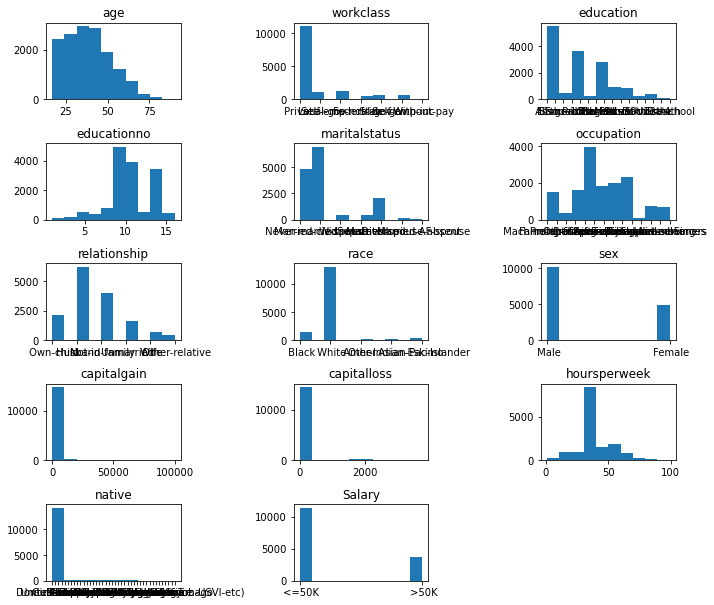

In [8]:
plt.figure(figsize=(10,25))

plt.subplot(5,2,2)
for i,j in enumerate(test.columns):
  plt.subplot(15,3,i+1)
  plt.hist(test[j])
  plt.title(j)
  plt.tight_layout()
plt.show()

<AxesSubplot:>

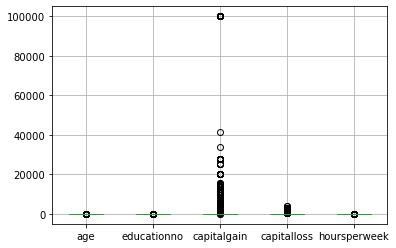

In [9]:
test.boxplot()

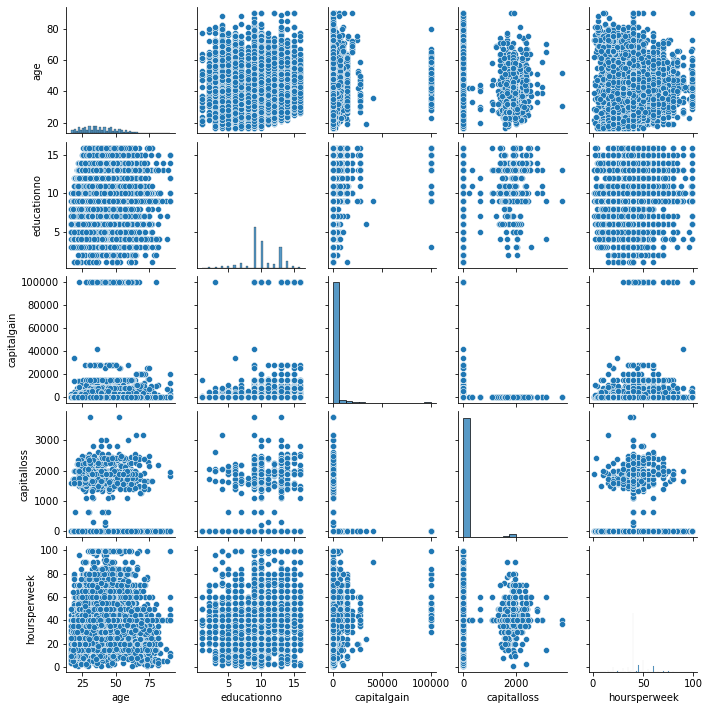

In [10]:
sns.pairplot(data = test, height = 2)

In [11]:
test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [12]:
for i in test.columns:
    print(i, '\n', test[i].value_counts(),'\n', '\n')

age 
 35    444
33    442
36    431
31    423
38    420
     ... 
85      2
88      2
89      1
87      1
84      1
Name: age, Length: 73, dtype: int64 
 

workclass 
  Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64 
 

education 
  HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64 
 

educationno 
 9     4943
10    3221
13    2526
14     887
11     652
7      571
12     499
6      403
4      266
15     243
5      221
8      200
16     169
3      161
2       71
1       27
Name: educationno, dt

<AxesSubplot:>

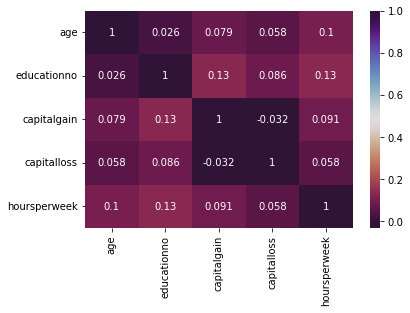

In [13]:
sns.heatmap(test.corr(), cmap="twilight_shifted_r", annot=True)

In [14]:
for col in test:
    print(f'{col}: {test[col].unique()}')

age: [25 38 28 44 34 63 24 55 65 36 26 48 43 20 37 45 22 23 54 32 46 56 17 29
 39 52 18 21 42 33 30 47 41 19 69 50 31 59 49 58 40 27 57 61 51 73 53 80
 62 35 72 64 68 66 60 67 71 70 90 77 81 74 78 82 75 85 76 89 83 79 88 87
 84]
workclass: [' Private' ' Local-gov' ' Self-emp-not-inc' ' Federal-gov' ' State-gov'
 ' Self-emp-inc' ' Without-pay']
education: [' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' 5th-6th' ' Assoc-voc' ' 9th'
 ' Doctorate' ' 12th' ' 1st-4th' ' Preschool']
educationno: [ 7  9 12 10  6 15  4 13 14  3 11  5 16  8  2  1]
maritalstatus: [' Never-married' ' Married-civ-spouse' ' Widowed' ' Separated'
 ' Divorced' ' Married-spouse-absent' ' Married-AF-spouse']
occupation: [' Machine-op-inspct' ' Farming-fishing' ' Protective-serv'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Tech-support' ' Sales' ' Priv-house-serv'
 ' Transport-moving' ' Handlers-cleaners' ' Armed-

# Encoading y yariable

Another approach to encoding categorical values is to use a technique called label encoding. Label encoding is simply converting each value in a column to a number. For example, the column contains 5 different values. We could choose to encode it like this:

* convertible -> 0
* hardtop -> 1
* hatchback -> 2
* sedan -> 3
* wagon -> 4


In [15]:
label_encoder = preprocessing.LabelEncoder()
test["Salary"]= label_encoder.fit_transform(test["Salary"]) 
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


## One Hot Encoding:

Label encoding has the advantage that it is straightforward but it has the disadvantage that the numeric values can be “misinterpreted” by the algorithms. For example, the value of 0 is obviously less than the value of 4.

A common alternative approach is called one hot encoding (but also goes by several different names shown below). Despite the different names, the basic strategy is to convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set.

In [16]:
ohe=OneHotEncoder(handle_unknown="ignore", sparse=False)

test_1=test.copy()
test_1.drop(["native"], axis ="columns", inplace = True)

columns1=["workclass","education","maritalstatus","occupation","relationship","race","sex"]


for i in columns1:
   x=pd.DataFrame(ohe.fit_transform(test_1[[i]]), columns=test_1[i].unique())
   test_1 = pd.concat([x,test_1], axis=1, join="inner").drop(i,axis=1)


test_1

,Male,Female,Black,White,Other,Amer-Indian-Eskimo,Asian-Pac-Islander,Own-child,Husband,Not-in-family,...,Federal-gov,State-gov,Self-emp-inc,Without-pay,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,25,7,0,0,40,0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,38,9,0,0,50,0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,28,12,0,0,40,1
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,44,10,7688,0,40,1
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,34,6,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,33,13,0,0,40,0
15056,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,39,13,0,0,36,0
15057,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,38,13,0,0,50,0
15058,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,44,13,5455,0,40,0


In [17]:
test_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 63 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0    Male                   15060 non-null  float64
 1    Female                 15060 non-null  float64
 2    Black                  15060 non-null  float64
 3    White                  15060 non-null  float64
 4    Other                  15060 non-null  float64
 5    Amer-Indian-Eskimo     15060 non-null  float64
 6    Asian-Pac-Islander     15060 non-null  float64
 7    Own-child              15060 non-null  float64
 8    Husband                15060 non-null  float64
 9    Not-in-family          15060 non-null  float64
 10   Unmarried              15060 non-null  float64
 11   Wife                   15060 non-null  float64
 12   Other-relative         15060 non-null  float64
 13   Machine-op-inspct      15060 non-null  float64
 14   Farming-fishing        15060 non-null

## Train Dataset :

In [18]:
train = pd.read_csv("C:\\Users\\Shivani Bhavsar\\OneDrive\\Documents\\ExcelR Assignment files\\DS\\A12 Naive bayes\\SalaryData_Train.csv")
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [20]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [21]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [22]:
train.agg(["skew","kurt"])

,age,educationno,capitalgain,capitalloss,hoursperweek
skew,0.53018,-0.305378,11.902483,4.528238,0.330856
kurt,-0.14476,0.643605,153.661174,19.529284,3.167683


In [23]:
train["Salary"].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

C:\Users\SHIVAN~1\AppData\Local\Temp/ipykernel_21512/3183779121.py:8: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


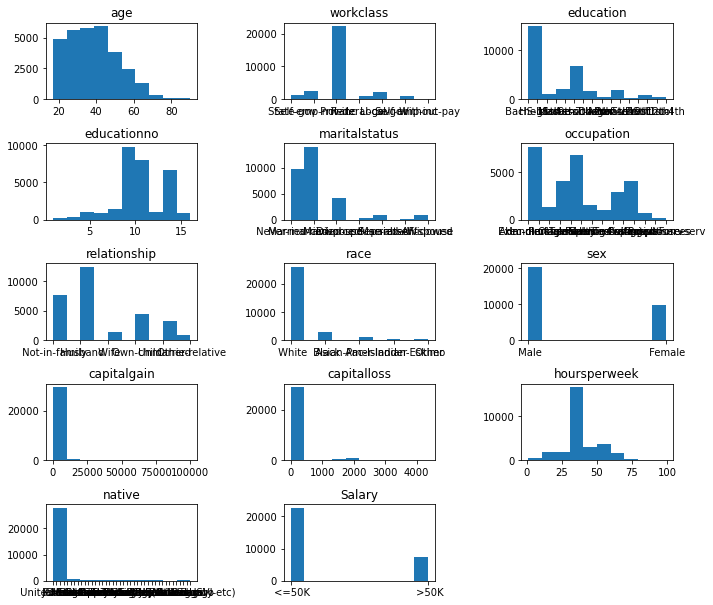

In [24]:
plt.figure(figsize=(10,25))

plt.subplot(5,2,2)
for i,j in enumerate(train.columns):
  plt.subplot(15,3,i+1)
  plt.hist(train[j])
  plt.title(j)
  plt.tight_layout()
plt.show()

<AxesSubplot:>

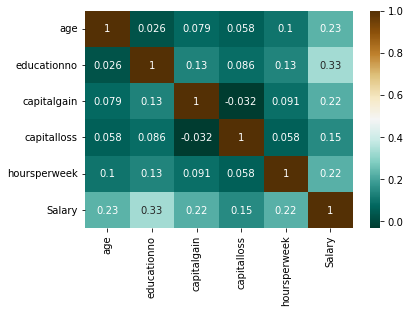

In [25]:
sns.heatmap(test.corr(), cmap="BrBG_r", annot=True)

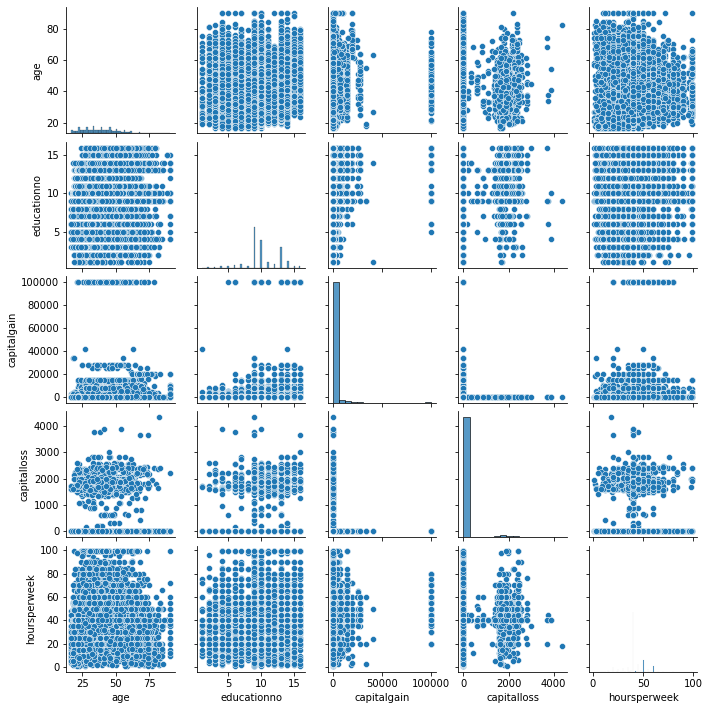

In [26]:
sns.pairplot(data = train, height = 2)

In [27]:
train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [28]:
test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [29]:
for i in train.columns:
    print(i, '\n', train[i].value_counts(),'\n', '\n')

age 
 36    852
31    851
33    837
34    836
37    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 72, dtype: int64 
 

workclass 
  Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64 
 

education 
  HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64 
 

educationno 
 9     9840
10    6677
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: educationno, dt

In [30]:
for col in train:
    print(f'{col}: {train[col].unique()}')

age: [39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86]
workclass: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
educationno: [13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]
maritalstatus: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-se

In [31]:
label_encoder = preprocessing.LabelEncoder()
train["Salary"]= label_encoder.fit_transform(train["Salary"]) 
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [32]:
ohe=OneHotEncoder(handle_unknown="ignore", sparse=False)

train_1=test.copy()
train_1.drop(["native"], axis ="columns", inplace = True)

columns1=["workclass","education","maritalstatus","occupation","relationship","race","sex"]


for i in columns1:
   x=pd.DataFrame(ohe.fit_transform(train_1[[i]]), columns=train_1[i].unique())
   train_1 = pd.concat([x,train_1], axis=1, join="inner").drop(i,axis=1)


train_1

,Male,Female,Black,White,Other,Amer-Indian-Eskimo,Asian-Pac-Islander,Own-child,Husband,Not-in-family,...,Federal-gov,State-gov,Self-emp-inc,Without-pay,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,25,7,0,0,40,0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,38,9,0,0,50,0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,28,12,0,0,40,1
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,44,10,7688,0,40,1
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,34,6,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,33,13,0,0,40,0
15056,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,39,13,0,0,36,0
15057,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,38,13,0,0,50,0
15058,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,44,13,5455,0,40,0


In [33]:
# # import category encoders

# import category_encoders as ce
# # encode remaining variables with one-hot encoding

# encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 
#                                  'race', 'sex', 'native'])

# X_train = encoder.fit_transform(X_train)

# X_test = encoder.transform(X_test)

In [34]:
list(train_1.columns)

[' Male',
 ' Female',
 ' Black',
 ' White',
 ' Other',
 ' Amer-Indian-Eskimo',
 ' Asian-Pac-Islander',
 ' Own-child',
 ' Husband',
 ' Not-in-family',
 ' Unmarried',
 ' Wife',
 ' Other-relative',
 ' Machine-op-inspct',
 ' Farming-fishing',
 ' Protective-serv',
 ' Other-service',
 ' Prof-specialty',
 ' Craft-repair',
 ' Adm-clerical',
 ' Exec-managerial',
 ' Tech-support',
 ' Sales',
 ' Priv-house-serv',
 ' Transport-moving',
 ' Handlers-cleaners',
 ' Armed-Forces',
 ' Never-married',
 ' Married-civ-spouse',
 ' Widowed',
 ' Separated',
 ' Divorced',
 ' Married-spouse-absent',
 ' Married-AF-spouse',
 ' 11th',
 ' HS-grad',
 ' Assoc-acdm',
 ' Some-college',
 ' 10th',
 ' Prof-school',
 ' 7th-8th',
 ' Bachelors',
 ' Masters',
 ' 5th-6th',
 ' Assoc-voc',
 ' 9th',
 ' Doctorate',
 ' 12th',
 ' 1st-4th',
 ' Preschool',
 ' Private',
 ' Local-gov',
 ' Self-emp-not-inc',
 ' Federal-gov',
 ' State-gov',
 ' Self-emp-inc',
 ' Without-pay',
 'age',
 'educationno',
 'capitalgain',
 'capitalloss',
 'hoursp

In [35]:
test_1.shape , train_1.shape

((15060, 63), (15060, 63))

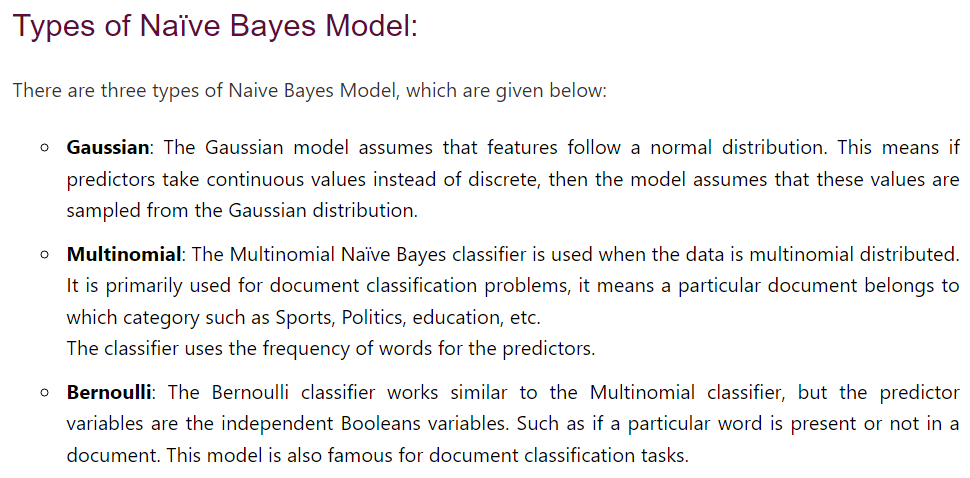

###   Here we use Gussian classifier for that first we have to normalized our data, for that here we use Robust Scaler.

## RobustScaler

It scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile. i.e., in between 25th quantile and 75th quantile range. This range is also called an Interquartile range. 
The median and the interquartile range are then stored so that it could be used upon future data using the transform method. If outliers are present in the dataset, then the median and the interquartile range provide better results and outperform the sample mean and variance. 
RobustScaler uses the interquartile range so that it is robust to outliers. Therefore its formula is as follows: 

> 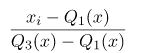

### Parameters of RobustScaler: 
 

* with_centering: boolean: It is True by default. If the value is True, the data is centred before scaling. When it is applied on sparse matrices, the transform will raise an exception because centring them requires building a dense matrix, which generally is too large to fit in the memory.

* with_scaling: boolean: It is also set to True by default. It scales the data to the interquartile range.

* quantile_range: tuple(q_min, q_max), 0.0 < q_min < q_max < 100.0 : Quantile range is used to calculate scale. By default, it is set as below. Default: (25.0, 75.0) = (1st quantile, 3rd quantile) = IQR.

* copy: boolean It is an optional parameter. By default, it is True. If the input is already a NumPy array or a scipy.sparse CSC matrix and if axis = 1, avoid a copy by setting this parameter to False and instead perform inplace row normalization.

### Attributes: 
 
* center_: array of floats: The median value for each feature in the training set.
* scale_: array of floats: The scaled interquartile range for the feature in the training set.

In [36]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

test_1=pd.DataFrame(scaler.fit_transform(test_1),columns=test_1.columns, index=test_1.index)
train_1=pd.DataFrame(scaler.fit_transform(train_1),columns=train_1.columns, index=train_1.index)

test_1

,Male,Female,Black,White,Other,Amer-Indian-Eskimo,Asian-Pac-Islander,Own-child,Husband,Not-in-family,...,Federal-gov,State-gov,Self-emp-inc,Without-pay,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.60,-0.75,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.05,-0.25,0.0,0.0,2.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.45,0.50,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.35,0.00,7688.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,-0.15,-1.00,0.0,0.0,-2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.20,0.75,0.0,0.0,0.0,0.0
15056,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.10,0.75,0.0,0.0,-0.8,0.0
15057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.05,0.75,0.0,0.0,2.0,0.0
15058,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.35,0.75,5455.0,0.0,0.0,0.0


In [37]:
x_train = train_1.iloc[:,0:62]
y_train = train_1.iloc[:,62]

x_test = test_1.iloc[:,0:62]
y_test = test_1.iloc[:,62]
y_train #, y_test

0        0.0
1        0.0
2        1.0
3        1.0
4        0.0
        ... 
15055    0.0
15056    0.0
15057    0.0
15058    0.0
15059    1.0
Name: Salary, Length: 15060, dtype: float64

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(x_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100)

80.71713147410358


In [40]:
y_test

0        0.0
1        0.0
2        1.0
3        1.0
4        0.0
        ... 
15055    0.0
15056    0.0
15057    0.0
15058    0.0
15059    1.0
Name: Salary, Length: 15060, dtype: float64

In [41]:
y_pred

array([0., 0., 1., ..., 1., 1., 1.])

In [42]:
y_pred_prob = gnb.predict_proba(x_test)
y_pred_prob

array([[1.00000000e+00, 3.30375225e-10],
       [7.61354457e-01, 2.38645543e-01],
       [4.16673066e-02, 9.58332693e-01],
       ...,
       [3.99007103e-03, 9.96009929e-01],
       [1.51762407e-03, 9.98482376e-01],
       [1.08322517e-04, 9.99891677e-01]])

In [43]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,1.000000e+00,3.303752e-10
1,7.613545e-01,2.386455e-01
2,4.166731e-02,9.583327e-01
3,6.171933e-14,1.000000e+00
4,1.000000e+00,3.511836e-08
...,...,...
15055,9.997886e-01,2.114075e-04
15056,9.985464e-01,1.453611e-03
15057,3.990071e-03,9.960099e-01
15058,1.517624e-03,9.984824e-01


Text(0, 0.5, 'Frequency')

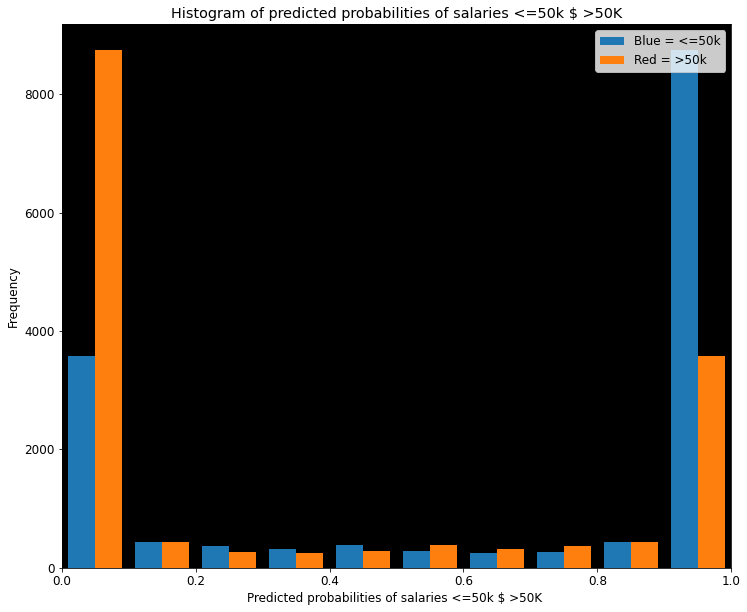

In [44]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12

plt.figure(figsize= (12,10))
plt.axes(facecolor='black')
# plot histogram with 10 bins
plt.hist(y_pred_prob_df, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries <=50k $ >50K')
plt.legend(["Blue = <=50k", "Red = >50k"], loc='upper right')

# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries <=50k $ >50K ')
plt.ylabel('Frequency')

Observations

In each row, the numbers sum to 1.

There are 2 columns which correspond to 2 classes - <=50K and >50K.

  * Class 0 => <=50K - Class that a person makes less than equal to 50K.

  * Class 1 => >50K - Class that a person makes more than 50K.

Importance of predicted probabilities

We can rank the observations by probability of whether a person makes less than or equal to 50K or more than 50K.
predict_proba process

Predicts the probabilities

Choose the class with the highest probability

Classification threshold level

There is a classification threshold level of 0.5.

Class 0 => <=50K - probability of salary less than or equal to 50K is predicted if probability < 0.5.

Class 1 => >50K - probability of salary more than 50K is predicted if probability > 0.5.

## ROC - AUC  Curve :

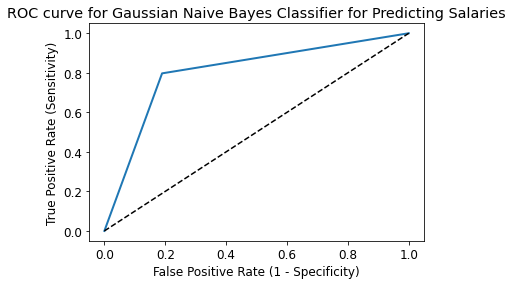

In [45]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

## Cross-validation score on predicted and actual values:

In [46]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, x_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8895


## Check for overfitting and underfitting

In [47]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(x_test, y_test)))

Training set score: 0.8072
Test set score: 0.8072


## Confusion Matrix :

Text(80.40000000000006, 0.5, 'predicted label')

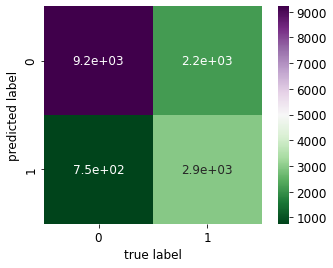

In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True, annot=True, cmap='PRGn_r')
plt.xlabel('true label')
plt.ylabel('predicted label')

## Classification Metrices:

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86     11360
         1.0       0.58      0.80      0.67      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.80      0.77     15060
weighted avg       0.84      0.81      0.82     15060



## K-fold Cross Validation :

>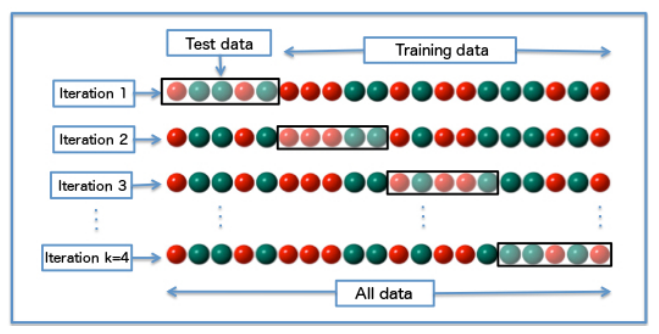

In [50]:
# Applying 10-Fold Cross Validation

scores = cross_val_score(gnb, x_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores.mean()))

Cross-validation scores:0.805909694555113


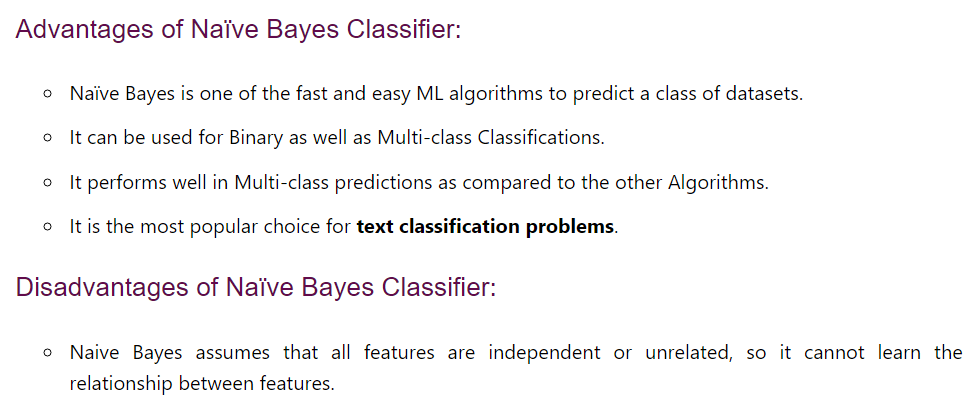